# DRL of Portfolio Optimization with LSTM Complex

In [1]:
from utils import load_data
from models import lstm_complex_model
from PortfolioEnvironment import PortfolioEnvironment
from DQNAgent import DQNAgent

import numpy as np

In [2]:
df = load_data()
df.head().T

,0,1,2,3,4
close,256.13,258.04,258.11,258.89,261.87
close2,45.82,45.85,45.13,44.90,45.13
close3,525.80,532.75,530.28,533.88,538.33
close4,267.15,267.88,268.48,272.25,278.12
close5,71.36,72.73,72.71,74.20,74.33


In [3]:
# Training the DQN agent
env = PortfolioEnvironment(df)
state_size = len(env.reset())  # Number of features in the state
action_size = 3  # Number of actions (Buy, Hold, Sell)
agent = DQNAgent(state_size, action_size, lstm_complex_model)

num_episodes = 100
batch_size = 32

C:\Users\MSI\.virtualenvs\FoML_Project\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Lists to store episode rewards
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    state = np.reshape(state.values, [1, state_size])
    total_reward = 0

    for step in range(env.max_steps):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state.values, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            break

    agent.replay(batch_size)
    agent.target_train()

    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

    episode_rewards.append(total_reward)
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

Episode: 1, Total Reward: 7.705199999999997
Episode: 2, Total Reward: -31.896800000000002
Episode: 3, Total Reward: -7.676999999999999
Episode: 4, Total Reward: 27.43849999999999
Episode: 5, Total Reward: 36.357799999999976
Episode: 6, Total Reward: 30.517300000000084
Episode: 7, Total Reward: 16.71290000000001
Episode: 8, Total Reward: 11.588999999999984
Episode: 9, Total Reward: 35.00530000000003
Episode: 10, Total Reward: -1.4289
Episode: 11, Total Reward: 28.78070000000001
Episode: 12, Total Reward: 20.323299999999996
Episode: 13, Total Reward: 13.38049999999999
Episode: 14, Total Reward: 44.66690000000003
Episode: 15, Total Reward: 58.55500000000002
Episode: 16, Total Reward: 44.613200000000006
Episode: 17, Total Reward: -32.00169999999998
Episode: 18, Total Reward: 84.7836
Episode: 19, Total Reward: 125.8724000000001
Episode: 20, Total Reward: 63.45669999999997
Episode: 21, Total Reward: 77.13709999999998
Episode: 22, Total Reward: 103.35040000000004
Episode: 23, Total Reward: 63

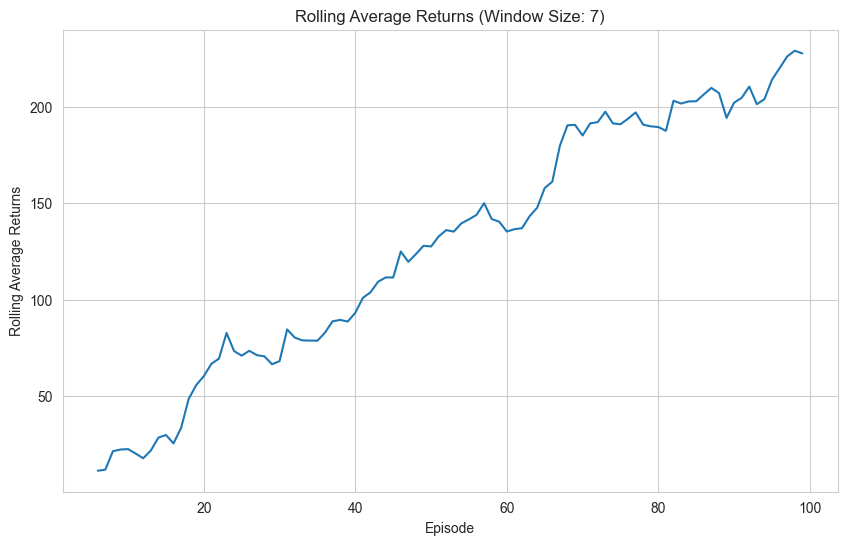

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert episode_rewards to a pandas Series
episode_rewards = pd.Series(episode_rewards)

# Calculate rolling average returns
window_size = 7
rolling_avg_returns = episode_rewards.rolling(window=window_size).mean()

# Plot rolling average returns
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_returns)
plt.xlabel('Episode')
plt.ylabel('Rolling Average Returns')
plt.title(f'Rolling Average Returns (Window Size: {window_size})')
plt.show()

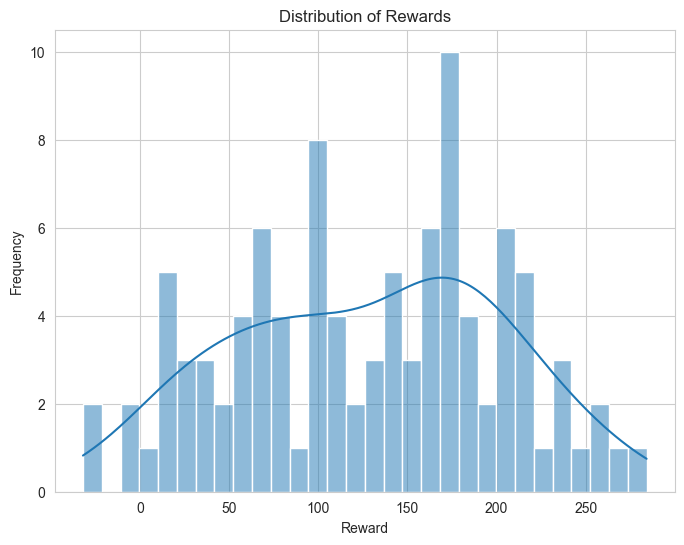

In [7]:
import seaborn as sns

# Plot reward distribution
plt.figure(figsize=(8, 6))
sns.histplot(episode_rewards, kde=True, bins=30)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Rewards')
plt.show()

# Plotting Model with Sample Actions and Sample Inputs

In [ ]:
from tensorflow.keras.utils import plot_model

input_shape = 248  # Example input shape (reduced)
num_actions = 5  # Example number of actions

# Build the model
model = lstm_complex_model(input_shape, num_actions)

img = plot_model(model)

img